<a href="https://colab.research.google.com/github/MKastek/time-series-notes/blob/main/cost_of_heating_time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from io import StringIO
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Input data

In [2]:
data_string = """
invoice issue date,cost of heating
11.2018,65
12.2018,91
1.2019,128
2.2019,123
3.2019,71
4.2019,22
5.2019,10
6.2019,5
7.2019,7
8.2019,8
9.2019,8
10.2019,24
2019-11-11,263
12.2019,385
1.2020,485
2.2020,455
3.2020,534
4.2020,328
5.2020,266
6.2020,281
7.2020,297
8.2020,307
9.2020,341
10.2020,365
11.2020,1225
12.2020,1377
1.2021,1373
2.2021,1153
2021-03-08,1209
4.2021,701
5.2021,569
6.2021,585
7.2021,625
8.2021,699
9.2021,730
10.2021,743
2021-11-09,1765
12.2021,1872
1/2022,1840
2/2022,1704
3/2022,2313
4/2022,1952
5/2022,1755
6/2022,979
7/2022,1271
8/2022,1384
9/2022,1360
10/2022,1363
11/2022,2719
12/2022,2961
"""

### Read Dataframe  
Invoise issue date is in different formats eg. `11.2018`, `2019-11-11`, `12/2022`. Time series ia a sequence of data points organized in time order. The sequence captures data at equally spaced points in time. Data collected irregularly is not considered a time series.  

Invoice issue date is changed to be regularly spaced - first day of month.

In [3]:
df = pd.read_csv(StringIO(data_string))

In [4]:
df

,invoice issue date,cost of heating
0,11.2018,65
1,12.2018,91
2,1.2019,128
3,2.2019,123
4,3.2019,71
5,4.2019,22
6,5.2019,10
7,6.2019,5
8,7.2019,7
9,8.2019,8


In [5]:
def clean_time_data(df: pd.DataFrame, time_column: str)-> pd.DataFrame:
  df[time_column] = df[time_column].apply(lambda x: x.replace('.','/'))
  df[time_column] = pd.to_datetime(df[time_column], errors='coerce');
  df[time_column] = df[time_column].dt.to_period('M').dt.to_timestamp()
  return df

In [6]:
df = clean_time_data(df, 'invoice issue date')

<ipython-input-5-f5d95a531b82>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[time_column] = pd.to_datetime(df[time_column], errors='coerce');


### Time series - plot

<Axes: xlabel='invoice issue date'>

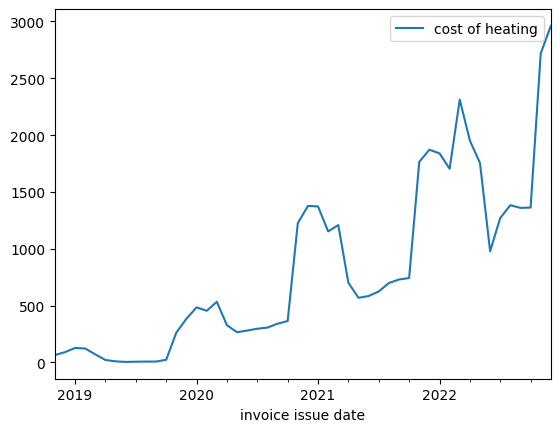

In [7]:
df.plot(x='invoice issue date', y='cost of heating')

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(x=df['cost of heating'], model='additive', period=11)

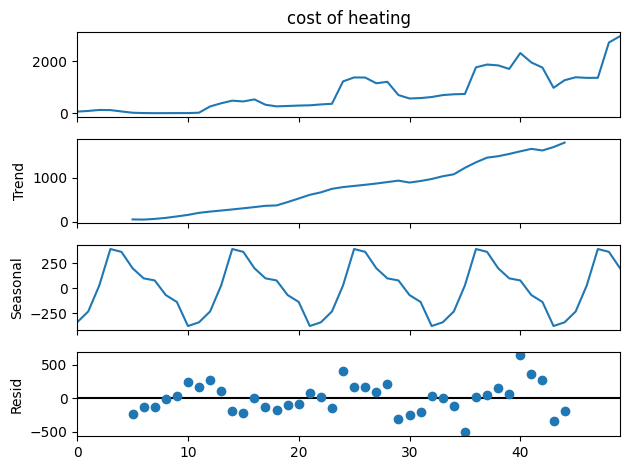

In [9]:
result.plot()
plt.show()

In [10]:
reconstructed = result.trend + result.seasonal + result.resid

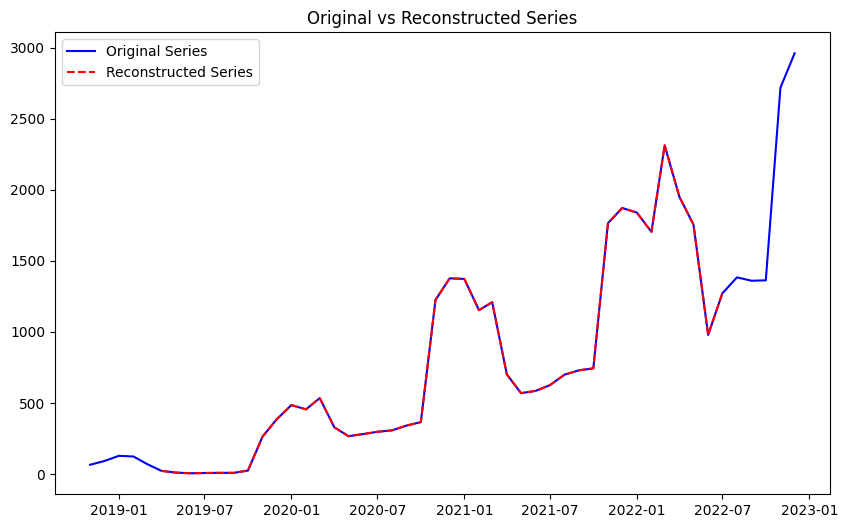

In [11]:
plt.figure(figsize=(10, 6))
plt.plot(df['invoice issue date'],df['cost of heating'], label='Original Series', color='blue')
plt.plot(df['invoice issue date'],reconstructed, label='Reconstructed Series', color='red', linestyle='--')
plt.legend()
plt.title("Original vs Reconstructed Series")
plt.show()

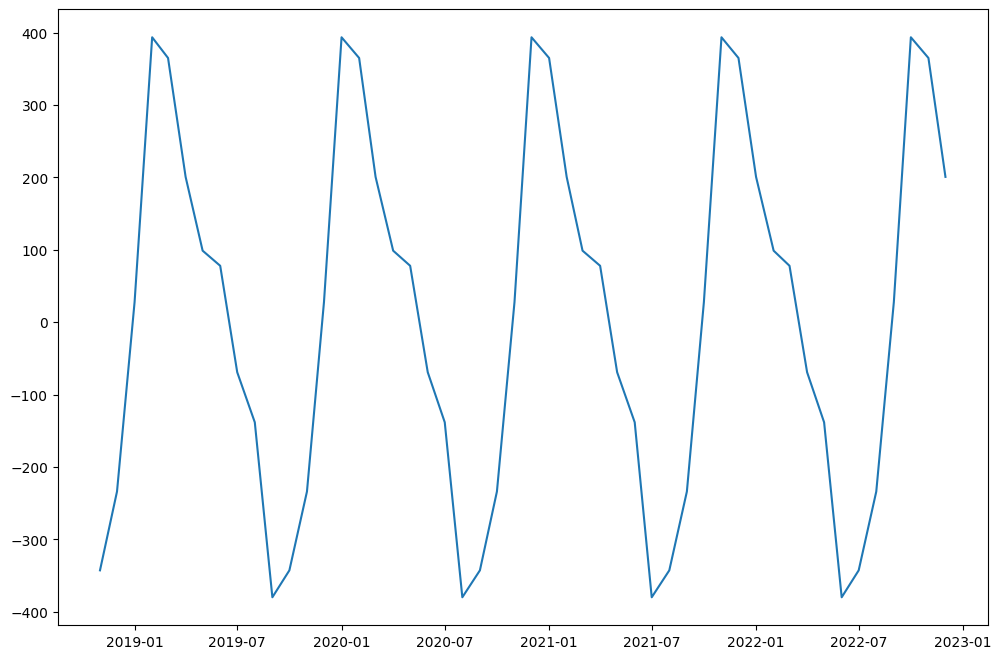

In [12]:
plt.figure(figsize=(12, 8))
plt.plot(df['invoice issue date'], result.seasonal, label='Seasonality')

In [13]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller

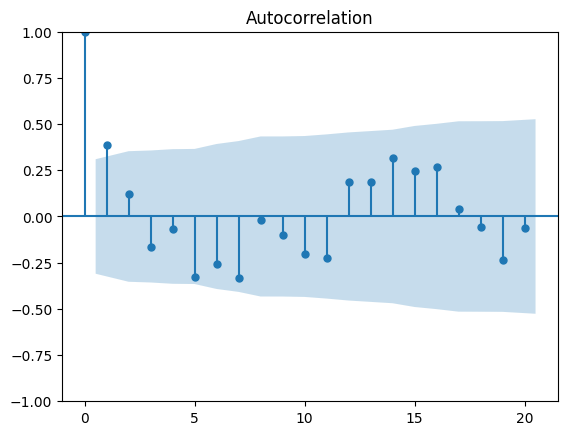

In [14]:
plot_acf(result.resid.dropna(), lags=20)
plt.show()

In [15]:
adf_result = adfuller(result.resid.dropna())
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')

ADF Statistic: -5.391757379701369
p-value: 3.5248764803040807e-06


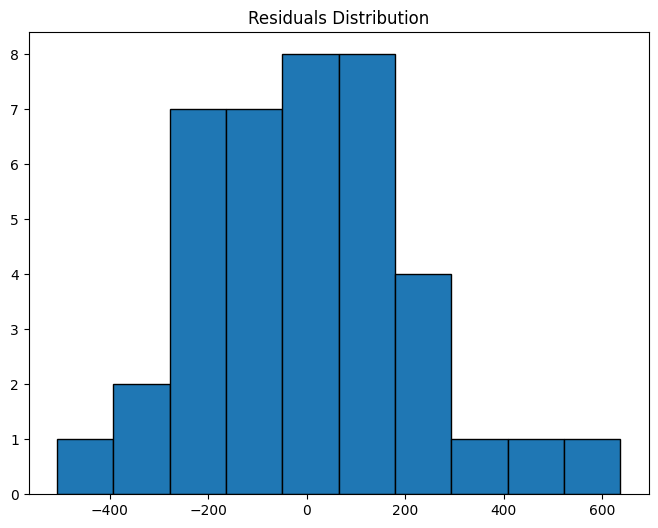

In [16]:
plt.figure(figsize=(8, 6))
plt.hist(result.resid.dropna(), bins=10, edgecolor='black')
plt.title('Residuals Distribution')
plt.show()

In [17]:
np.mean(result.resid.dropna())

3.8450413223140103

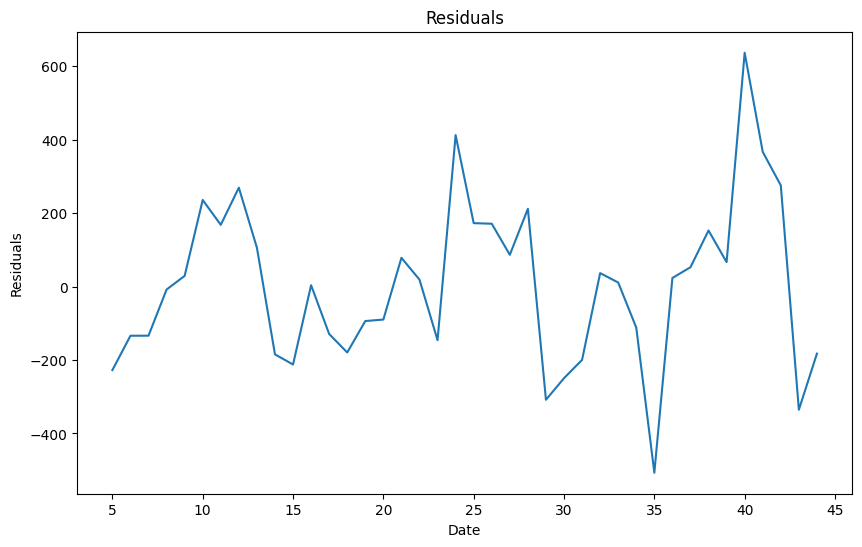

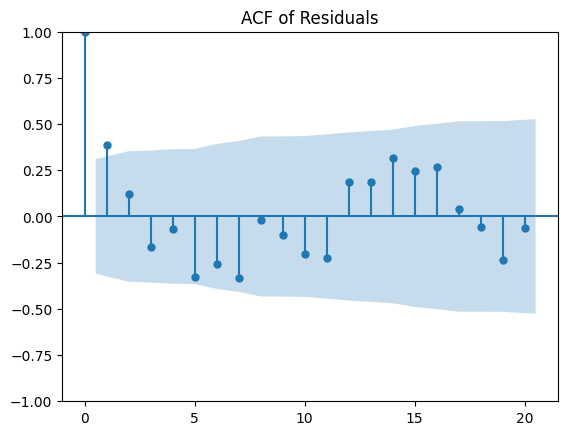

ADF Statistic: -5.391757379701369
p-value: 3.5248764803040807e-06


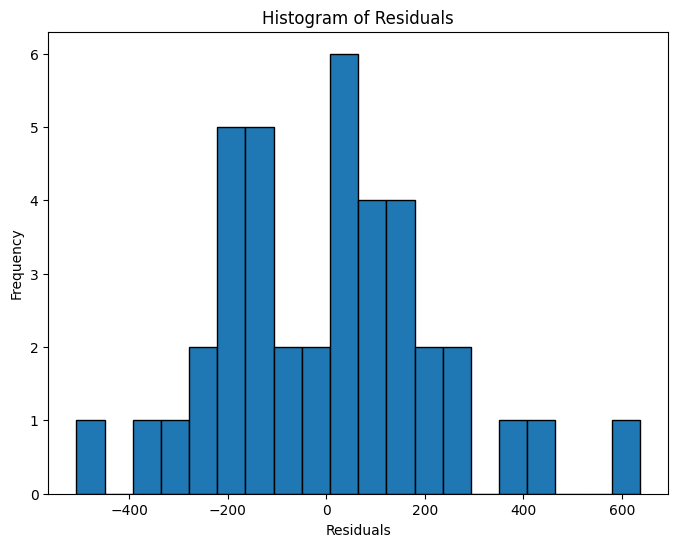

In [18]:
residuals = result.resid.dropna()
# 1. Plot the residuals
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.title('Residuals')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.show()

# 2. Plot ACF of residuals (AutoCorrelation Function)
plot_acf(residuals.dropna(), lags=20)
plt.title('ACF of Residuals')
plt.show()

# 3. Perform Augmented Dickey-Fuller test to check for stationarity
adf_result = adfuller(residuals.dropna())
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')

# 4. Check for normality of residuals (optional)
plt.figure(figsize=(8, 6))
plt.hist(residuals.dropna(), bins=20, edgecolor='black')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()